In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests
import re

In [2]:

# Request the raw html from the webpage
# html = requests.get('https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/')
html = requests.get('https://www.transfermarkt.co.uk/statistik/wintertransfers', headers={'User-Agent': 'Custom'})
# html = requests.get('https://www.transfermarkt.co.uk/statistik/wintertransfers?ajax=yw1&page=2', headers={'User-Agent': 'Custom'})

# Build a tree, or nested data structure, from the webpage
soup = BeautifulSoup(html.text, 'html5lib')

In [3]:

# Try to get links of top movies
# soup('a', {'class':'unstyled articleLink'})
# Hmm, got a lot more than that

# Get all the tables in the html document
# tables = soup('table', {'class':'table'})
tables = soup('table', {'class':'items'})

table = tables[0]
# links = table('a', {'class':'unstyled articleLink'})
nameLinks = table('a', {'class':'spielprofil_tooltip'})
# marketValueRows = table('td', {'class':'rechts bg_gruen_20','class':'rechts'})
marketValueRows = table('td', {'class':'rechts bg_gruen_20','class':'rechts'})
ageRows = table('td', {'class': 'zentriert'})

# feeRows = table('td', {'class': 'rechts hauptlink'})

In [4]:
ages =[age.text for age in ageRows]
age = ages[1::3]

In [5]:
names = [nameLink.text for nameLink in nameLinks]
marketValues = [marketvalue.text for marketvalue in marketValueRows]
# print(len(names))
# print(len(marketValues))
npvalues = np.array(marketValues)
dataframe = pd.DataFrame(npvalues.reshape(25,2))
df = pd.DataFrame(names, columns=['name'])
df['age'] = age
df['value'] = dataframe[0]
df['fee'] = dataframe[1]
df['value'] = dataframe[0]
df['fee'] = dataframe[1]
# df

In [6]:
df['fee'] = df['fee'].str.replace('Loan fee:', '')
df['fee'] = df['fee'].str.replace('£900k', '.9')
df['fee'] = df['fee'].str.replace('Loan', '0')
df['fee'] = df['fee'].str.replace('£', '')
df['fee'] = df['fee'].str.replace('m', '').astype('float')
df['value']=df['value'].str.replace('£', '')
df['value'] = df['value'].str.replace('m', '').astype('float')
df1 = df.copy()

In [7]:
html = requests.get('https://www.transfermarkt.co.uk/statistik/wintertransfers?ajax=yw1&page=2', headers={'User-Agent': 'Custom'})
soup = BeautifulSoup(html.text, 'html5lib')
tables = soup('table', {'class':'items'})
table = tables[0]
nameLinks = table('a', {'class':'spielprofil_tooltip'})
marketValueRows = table('td', {'class':'rechts bg_gruen_20','class':'rechts'})
ageRows = table('td', {'class': 'zentriert'})
ages =[age.text for age in ageRows]
age = ages[1::3]

names = [nameLink.text for nameLink in nameLinks]
marketValues = [marketvalue.text for marketvalue in marketValueRows]
npvalues = np.array(marketValues)
dataframe = pd.DataFrame(npvalues.reshape(25,2))
df = pd.DataFrame(names, columns=['name'])
df['age'] = age

df['value'] = dataframe[0]
df['fee'] = dataframe[1]
df['value'] = dataframe[0]
df['fee'] = dataframe[1]
df['fee'] = df['fee'].str.replace('Loan fee:', '')
df['fee'] = df['fee'].str.replace('£900k', '.9')
df['fee'] = df['fee'].str.replace('Loan', '0')
df['fee'] = df['fee'].str.replace('£', '')
df['fee'] = df['fee'].str.replace('m', '').astype('float')
df['value']=df['value'].str.replace('£', '')
df['value'] = df['value'].str.replace('m', '').astype('float')
df2 = df.copy()

In [8]:
html = requests.get('https://www.transfermarkt.co.uk/statistik/wintertransfers?ajax=yw1&page=3', headers={'User-Agent': 'Custom'})
soup = BeautifulSoup(html.text, 'html5lib')
tables = soup('table', {'class':'items'})
table = tables[0]
nameLinks = table('a', {'class':'spielprofil_tooltip'})
marketValueRows = table('td', {'class':'rechts bg_gruen_20','class':'rechts'})
ageRows = table('td', {'class': 'zentriert'})
ages =[age.text for age in ageRows]
age = ages[1::3]
names = [nameLink.text for nameLink in nameLinks]
marketValues = [marketvalue.text for marketvalue in marketValueRows]
npvalues = np.array(marketValues)
dataframe = pd.DataFrame(npvalues.reshape(25,2))
df = pd.DataFrame(names, columns=['name'])
df['age'] = age

df['value'] = dataframe[0]
df['fee'] = dataframe[1]
df['value'] = dataframe[0]
df['fee'] = dataframe[1]
df['fee'] = df['fee'].str.replace('Loan fee:', '')
df['fee'] = df['fee'].str.replace('£900k', '.9')
df['fee'] = df['fee'].str.replace('Loan', '0')
df['fee'] = df['fee'].str.replace('£', '')
df['fee'] = df['fee'].str.replace('675k', '.675')
df['fee'] = df['fee'].str.replace('400k', '.400')
df['fee'] = df['fee'].str.replace('450k', '.450')

df['fee'] = df['fee'].str.replace('Free transfer', '0')
df['fee'] = df['fee'].str.replace('m', '').astype('float')
df['value']=df['value'].str.replace('£', '')
df['value'] = df['value'].str.replace('m', '').astype('float')
df3 = df.copy()

In [9]:
df_final = pd.concat([df1, df2, df3]).reset_index(drop=True)

In [10]:
df_final['age'] = df_final['age'].astype('int')

In [11]:
# get rid of the fee's that were zero due to loan
df_final = df_final[df_final.fee > 0]

Text(0, 0.5, 'Transfer Fee (million pounds)')

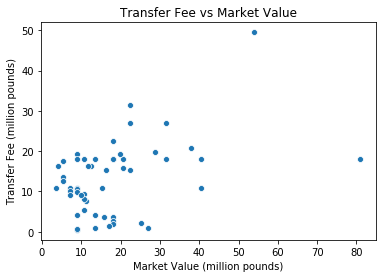

In [12]:
# we don't see as clear of a realtionship between player market value and tranfer fee
# when we only use the top 25 transfers.
# there may be other more important features of a player like their age, position, or when their 
# contract is up that is more related to their transfer fee.
sns.scatterplot('value', 'fee', data=df_final)
plt.title('Transfer Fee vs Market Value')
plt.xlabel('Market Value (million pounds)')
plt.ylabel('Transfer Fee (million pounds)')
# sns.scatterplot(x='yearID', y='H', data=playerHits.sample(frac=0.1), s=8)

In [13]:
# here we see that there is no real sign of a positive corelation with a p-value of .139
# especially with 
stats.pearsonr(df_final.fee, df_final.value)


(0.42648929371078553, 0.001300776800659551)

Text(0, 0.5, 'Transfer Fee (million pounds)')

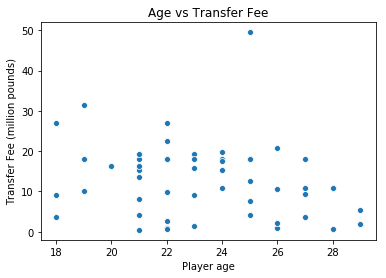

In [14]:
sns.scatterplot('age', 'fee', data=df_final)
plt.title('Age vs Transfer Fee')
plt.xlabel('Player age')
plt.ylabel('Transfer Fee (million pounds)')

Text(0, 0.5, 'Market Value (million pounds)')

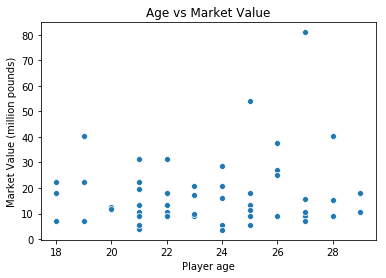

In [15]:
sns.scatterplot('age', 'value', data=df_final)
plt.title('Age vs Market Value')
plt.xlabel('Player age')
plt.ylabel('Market Value (million pounds)')

Text(0.5, 0, 'Fee')

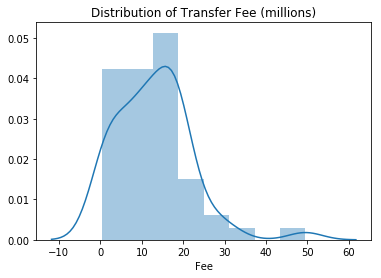

In [16]:
sns.distplot(df_final.fee)
plt.title('Distribution of Transfer Fee (millions)')
plt.xlabel('Fee')

Text(0.5, 0, 'Player Market Value')

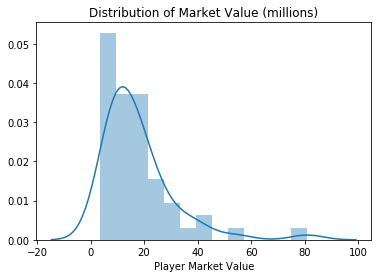

In [17]:
sns.distplot(df_final.value)
plt.title('Distribution of Market Value (millions)')
plt.xlabel('Player Market Value')

In [18]:
display(df_final.value.mean())
display(df_final.fee.mean())

stats.ttest_ind(df_final.value, df_final.fee)
# stats.ttest_ind(df[df.State == 'MI'].Score, df[df.State == 'CA'].Score)

17.675

12.914259259259257

Ttest_indResult(statistic=2.1379903060307424, pvalue=0.034815411920796215)

In [19]:
groupedByAge = df_final.groupby('age')


In [20]:
groupedByAge.agg([ 'size','mean','std'])

value                       fee                      
     size      mean        std size       mean        std
age                                                      
18      3  15.90000   7.863205    3  13.200000  12.252347
19      3  23.40000  16.668233    3  19.860000  10.830457
20      2  12.15000   0.636396    2  16.200000   0.000000
21      8  14.56875   9.396083    8  11.868750   6.891814
22      8  15.97500   7.402075    8  12.459375  10.336671
23      5  13.14000   5.422453    5  12.646000   7.441588
24      5  14.94000  10.564942    5  16.308000   3.470781
25      6  18.52500  17.888090    6  18.300000  16.264040
26      4  24.75000  11.883181    4   8.617500   9.130565
27      5  24.75000  31.605893    5  10.530000   5.126841
28      3  21.60000  16.668233    3   7.425000   5.845671
29      2  14.40000   5.091169    2   3.600000   2.545584

In [21]:
oldPpl = df_final[df_final.age >= 25]
youngPpl = df_final[df_final.age < 25]

In [22]:
display(oldPpl.fee.mean())
display(oldPpl.fee.std())
display(youngPpl.fee.mean())
display(youngPpl.fee.std())

11.319750000000003

10.862841597196816

13.852205882352942

7.958113754658548

Text(0.5, 0, 'Player Fee')

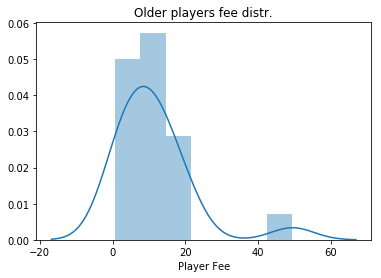

In [23]:
sns.distplot(oldPpl.fee)
plt.title('Older players fee distr.')
plt.xlabel('Player Fee')

Text(0.5, 0, 'Player Fee')

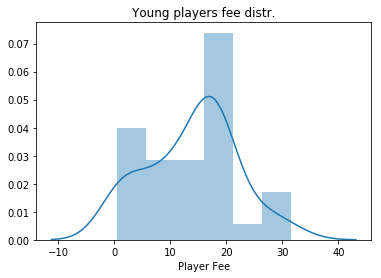

In [24]:
sns.distplot(youngPpl.fee)
plt.title('Young players fee distr.')
plt.xlabel('Player Fee')

In [25]:
stats.ttest_ind(youngPpl.fee, oldPpl.fee)

Ttest_indResult(statistic=0.9845971119855146, pvalue=0.3293812096270231)

# Using the requests package to scrape soccer news articles for player names

## Popular soccer news sites (transfer rumors pages)

In [26]:
urls = {
    'SkySports':'https://www.skysports.com/football/transfer-news',
    'OneFootball':'https://en.onefootball.com/tag/transfer-window/',
    '90min':'https://www.90min.com/categories/transfer?view_source=nav_bar&viewmedium=nav_bar_channels.name.transfer',
    'newsnow':'https://www.newsnow.co.uk/h/Sport/Football/Transfer+Talk/Top+Sources',
    'talksport':'https://talksport.com/football/transfer-rumours/',
    'sbnation':'https://www.sbnation.com/transfer-rumors'
}

sites = [requests.get(url) for url in urls.values()]
list(sites[0])[0]

b'<!doctype html public "">\n<html lang="en" class="no-js">\n<head>\n    <title>Transfer Centre - Football Transfers News & Rumours  '

### Read in and clean data:
    generate list to be used for scraping

In [27]:
df_players = pd.read_csv('SoccerPlayerData.csv')
# df_players.head()
# df_names = df_players['Name']
df_names = df_players['Name'].str.split(pat=' ',expand=True)
df_names = df_names[(df_names[1] != False)]
df_names = df_names[1]
df_names = df_names.drop_duplicates()
# df_names = df_players['Name']
players = df_names.values.tolist()
players = [i for i in players if i]

print(len(players))

11631


## Scrape the news sites for occurences of player names

In [28]:
df = pd.DataFrame({'Site':list(urls.keys())})
# players =
for i in range(len(players)):
    df.insert(loc=i+1, column=players[i], value=[len([m for m in re.finditer(players[i], html.text)]) for html in sites])
df

,Site,Ronaldo,Messi,Suárez,Neuer,Gea,Lewandowski,Bale,Ibrahimović,Courtois,...,Hornby,Sargeant,Alzate,Dalby,Clifton,McElhinney,Dunbar,McGoey,Ouldridge,Foden
0,SkySports,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OneFootball,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90min,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,newsnow,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,talksport,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,sbnation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Find the sum of number of occurences of each players names across the 6 sites

In [29]:
sums = df.sum(axis=0)
sums = sums[sums != 0]
sums = sums.drop(labels='Site')
sums = sums.sort_values(ascending=False)

### Filter out short names/prefixes

In [30]:
sums = sums[5:]
print(sums)

N.           870
ter          864
Le           176
Nam          172
Ba           147
            ... 
Kingsley       1
Gallagher      1
Ui             1
Eagles         1
Neill          1
Length: 349, dtype: object


### Read in data file detailing player name, market value, and transfer fee

In [31]:
df_confirmed = df_final
df_confirmed.head()

,name,age,value,fee
0,Christian Eriksen,27,81.0,18.0
1,Bruno Fernandes,25,54.0,49.5
2,Erling Haaland,19,40.5,18.0
3,Duván Zapata,28,40.5,10.8
4,Paco Alcácer,26,37.8,20.7


### Clean data to split into first and last name

In [32]:
df_names_confirmed = df_confirmed['name'].str.split(pat=' ',expand=True)
df_last = df_names_confirmed[1]
print(type(df_last))


<class 'pandas.core.series.Series'>


### Continue cleaning the data by dropping duplicates and converting into a list to be used for web scraping

In [33]:
df_last = df_last.drop_duplicates()
players = df_last.to_list()
players = [i for i in players if i]
print(players)

['Eriksen', 'Fernandes', 'Haaland', 'Zapata', 'Alcácer', 'Kulusevski', 'Olmo', 'Bergwijn', 'Piatek', 'Can', 'Politano', 'Palacios', 'Tousart', 'Weigl', 'Barbosa', 'Berge', 'Bowen', 'Pedro', 'de', 'Cutrone', 'Lobotka', 'En-Nesyri', 'Guimarães', 'Rose', 'Amrabat', 'Podence', 'Lazaro', 'Tchouaméni', 'Petagna', 'Cunha', 'Tapsoba', 'Toko', 'Demme', 'Fofana', 'Rrahmani', 'Minamino', 'Dabbur', 'Murillo', 'Samatta', 'Kadewere', 'Mooy', 'Bruun', 'Cavaleiro', 'Okafor', 'Ascacíbar', 'Oudin', 'Pavlovic', 'Onyekuru', 'Saracchi', 'Vogt', 'Rodríguez']


# Change URLs to be the home soccer page instead of transfers
   ### If you want to see transfers then run URLs above with the rest of the code below

In [34]:
urls = {
    'SkySports':'https://www.skysports.com/football/news',
    'OneFootball':'https://en.onefootball.com',
    '90min':'https://www.90min.com',
    'newsnow':'https://www.newsnow.co.uk/h/Sport/Football',
    'talksport':'https://talksport.com/football/',
    'sbnation':'https://www.sbnation.com/soccer'
}

sites = [requests.get(url) for url in urls.values()]
list(sites[0])[0]

b'<!doctype html>\n<html lang="en" class="no-js">\n<head>\n\n    <meta charset="utf-8">\n    <title>Football News | Sky Sports</title>\n'

## Scrape the homepages for player name occurances

In [35]:
df = pd.DataFrame({'Site':list(urls.keys())})
# players =
for i in range(len(players)):
    df.insert(i+1, players[i], [len([m for m in re.finditer(players[i], html.text)]) for html in sites])
df

,Site,Eriksen,Fernandes,Haaland,Zapata,Alcácer,Kulusevski,Olmo,Bergwijn,Piatek,...,Bruun,Cavaleiro,Okafor,Ascacíbar,Oudin,Pavlovic,Onyekuru,Saracchi,Vogt,Rodríguez
0,SkySports,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OneFootball,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90min,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,newsnow,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,talksport,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,sbnation,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Do the sums again

In [36]:
sums = df.sum(axis=0)
sums = sums[sums != 0]
sums = sums.drop(labels='Site')
sums = sums.drop(labels='de')
sums = sums.sort_values(ascending=False)

In [37]:
print(sums)

Eriksen      16
Can          10
Fernandes     7
Bergwijn      1
Haaland       1
dtype: object
